In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline

import sys
import warnings
warnings.filterwarnings('ignore')

### Preliminary investigation of the data - PCA + KMeans Scree Plot using sklearn

(7500, 177)


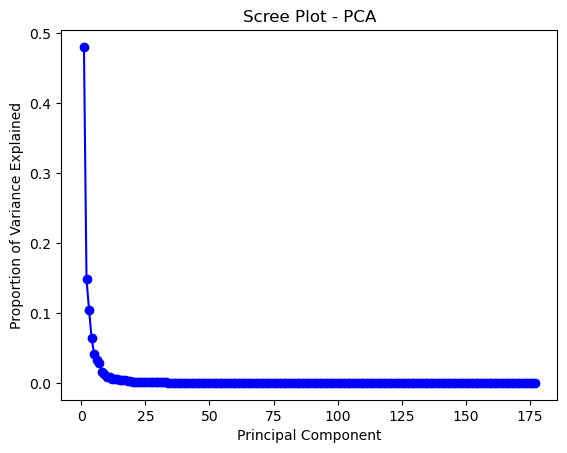

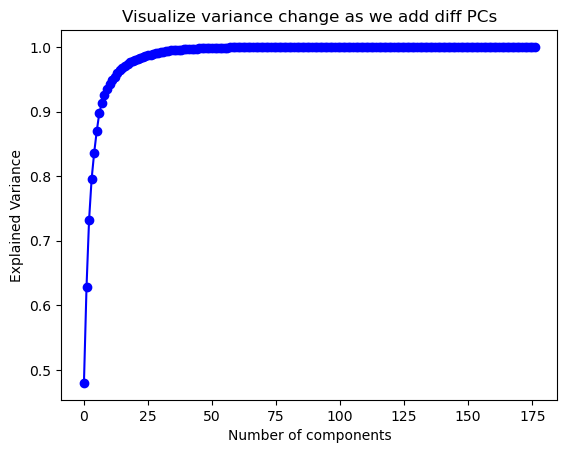

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950


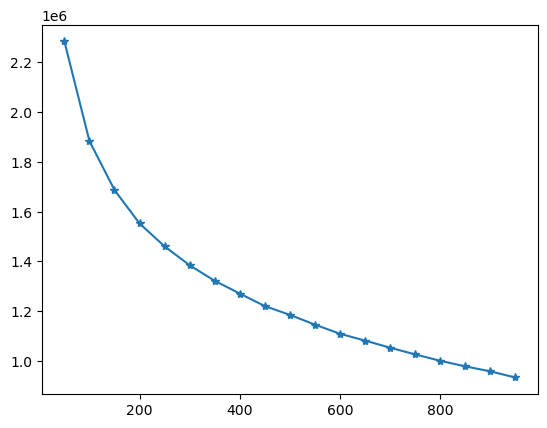

In [49]:
data = np.loadtxt("high_variance_distances.dat")
data_pts = data.copy()
print(data.shape)

pca = PCA()
pca.fit(data)
new_data = pca.transform(data)

PC_values = np.arange(pca.n_components_) + 1

plt.title("Scree Plot - PCA")
plt.plot(PC_values, pca.explained_variance_ratio_, "bo-")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.show()

plt.title("Visualize variance change as we add diff PCs")
plt.ylabel("Explained Variance")
plt.xlabel("Number of components")
plt.plot(np.cumsum(pca.explained_variance_ratio_), "bo-")
plt.show()

obj_list = []
kmin = 50
kmax = 1000
kstep = 50
for k in range(kmin, kmax, kstep):
    print(k)
    kmeans = KMeans(n_clusters=k).fit(data)
    obj_min = kmeans.inertia_
    obj_list.append(obj_min)

plt.plot(np.arange(kmin, kmax, kstep), obj_list, "*-")


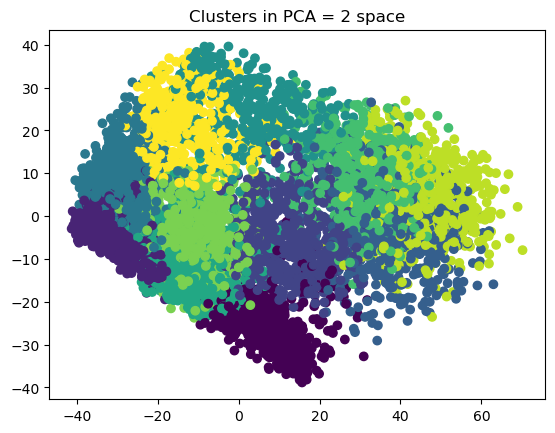

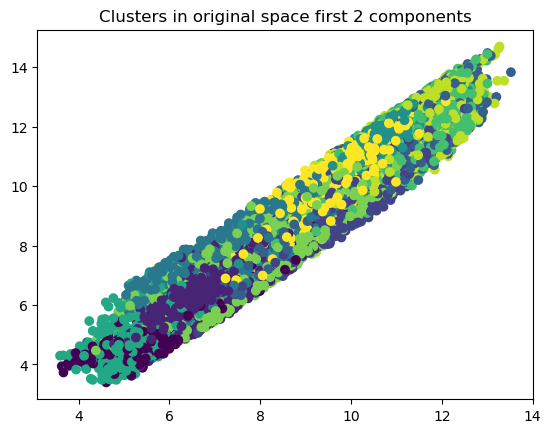

In [3]:
x = data.copy()
nc_pca = 2
pca_2 = PCA(n_components=nc_pca)
new_x = pca_2.fit_transform(x)
skm = KMeans(n_clusters=11).fit(x)
skz = skm.labels_
plt.title(f"Clusters in PCA = {nc_pca} space")
plt.scatter(new_x[:, 0], new_x[:, 1], c=skz)
plt.show()
plt.title("Clusters in original space first 2 components")
plt.scatter(x[:, 0], x[:, 1], c=skz)
plt.show()


In [4]:
class kmeans:
    def __init__(self, N_c):
        self.N_centroids = N_c

    def initialization_of_centroids_random(self):
        sel = np.random.choice(self.N_points, size=self.N_centroids, replace=False)
        return self.data[sel]

    def initialization_of_centroids_plusplus(self):
        i = rd.randint(0, self.N_points - 1)
        centroids = np.array([self.data[i]])
        for k in range(1, self.N_centroids):
            D = np.array([])
            D = np.append(D, np.min(cdist(self.data, centroids, "sqeuclidean"), axis=1))
            prob = D / np.sum(D)
            cumulative_prob = np.cumsum(prob)
            r = rd.random()
            i = 0
            for j, p in enumerate(cumulative_prob):
                if r < p:
                    i = j
                    break
            centroids = np.append(centroids, [self.data[i]], axis=0)
        return centroids

    def fit(self, data, init="random", N_max_iterations=1000):
        self.data = data
        self.N_points = np.shape(self.data)[0]

        if init == "k-means++":
            self.centroid_positions = self.initialization_of_centroids_plusplus()
        else:
            self.centroid_positions = self.initialization_of_centroids_random()

        for cnt in range(N_max_iterations):
            dist2_mat = cdist(self.data, self.centroid_positions, "sqeuclidean")
            dist2_min = np.array([np.min(dist2_mat, axis=1)])
            self.labels = np.argmin(dist2_mat, axis=1)
            loss = dist2_min.sum()
            skip = False
            for i in range(self.N_centroids):
                if len(self.data[self.labels == i]) == 0:
                    skip = True
            if skip == True:
                self.centroid_positions = self.initialization_of_centroids_random()
                continue
            new_centers = np.array([self.data[self.labels == i].mean(axis=0) for i in range(self.N_centroids)])
            if np.all(self.centroid_positions == new_centers):
                break
            self.centroid_positions = new_centers
        if cnt == N_max_iterations - 1:
            print("Max iterations reached")
        return loss, cnt, new_centers

    def plot(self):
        colors = plt.cm.get_cmap("rainbow")(np.linspace(0, 1, self.N_centroids))
        label_set = set(self.labels)
        label_count = len(label_set)
        for cen in range(self.N_centroids):
            arr_points = self.data[self.labels == cen]
            plt.scatter(arr_points[:, 0], arr_points[:, 1], color=colors[cen], s=4)
        plt.scatter(self.centroid_positions[:, 0], self.centroid_positions[:, 1], color="k")
        title_text = "No. of Points: %d, No. of Labels: %d" % (self.N_points, label_count)
        plt.title(title_text)
        plt.xlabel("x")
        plt.ylabel("y")
        plt.show()

    def get_assignation(self):
        out = np.empty((self.N_points, 3))
        for idx in range(self.N_points):
            out[idx, 0] = self.data[idx][0]
            out[idx, 1] = self.data[idx][1]
            out[idx, 2] = self.labels[idx]
        return out

    def get_centroid_positions(self):
        return self.centroid_positions


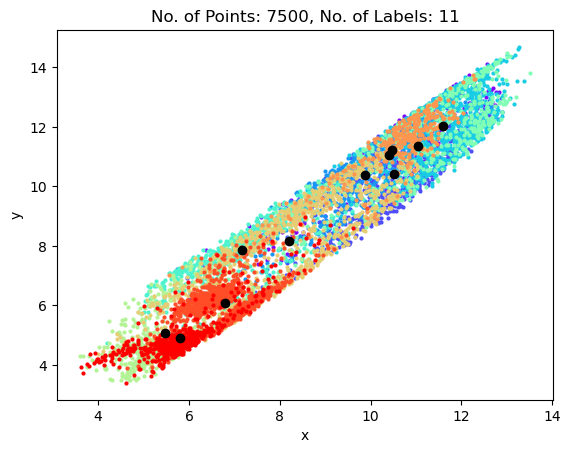

3591875.713535259 73


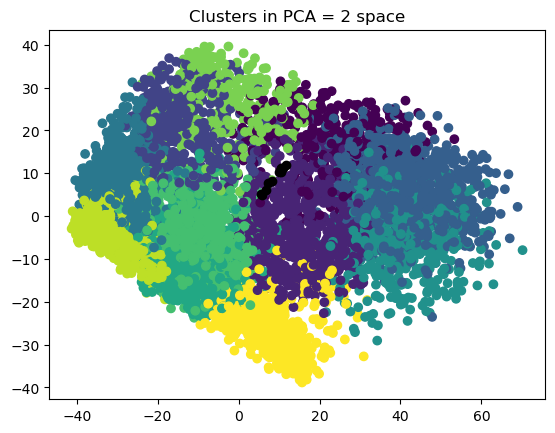

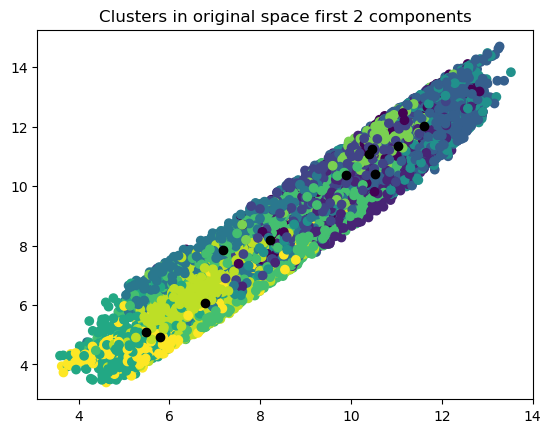

In [5]:
test_k = 11
test_km = kmeans(test_k)
loss, iteration, test_centroid_positions = test_km.fit(data)
test_km.plot()
print(loss, iteration)

test_labels = test_km.get_assignation()
# test_centroid_positions = test_km.get_centroid_positions()

plt.title(f"Clusters in PCA = {nc_pca} space")
plt.scatter(new_x[:, 0], new_x[:, 1], c=test_labels[:, 2])
plt.scatter(test_centroid_positions[:, 0], test_centroid_positions[:, 1], color="k")
plt.show()

plt.title("Clusters in original space first 2 components")
plt.scatter(test_labels[:, 0], test_labels[:, 1], c=test_labels[:, 2])
plt.scatter(test_centroid_positions[:, 0], test_centroid_positions[:, 1], color="k")
plt.show()


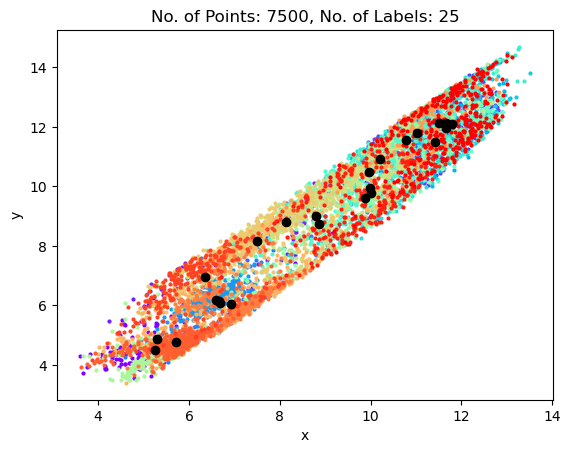

mean =  2815689.755016376
i_min =  22
min =  2781180.6431868393
avg convergence =  49.6


In [6]:
N_simulations = 30
tmp_km = kmeans(25)
min_loss = np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss, iteration, _ = tmp_km.fit(data=data_pts, init="random")
    if loss < min_loss:
        min_loss = loss
        i_min = i
        min_km = tmp_km
    # print(i, loss, iteration)
    losses[i] = loss
    iterations[i] = iteration

min_km.plot()
print("mean = ", losses.mean())
print("i_min = ", i_min)
print("min = ", losses[i_min])
print("avg convergence = ", iterations.mean())
plt.show()


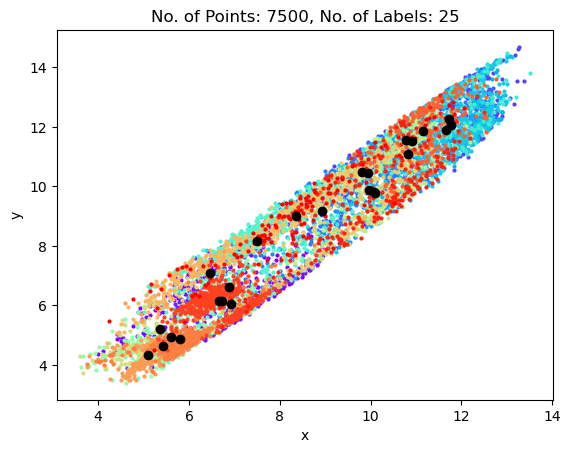

mean =  2794970.2150196116
i_min =  5
min =  2769836.3859905736
avg convergence =  45.2


In [7]:
N_simulations = 30
tmp_kmpp = kmeans(25)
min_loss = np.inf
losses = np.empty(N_simulations)
i_tmp = 0
iterations = np.empty(N_simulations)
for i in range(N_simulations):
    loss, iteration, _ = tmp_kmpp.fit(data=data_pts, init="k-means++")
    if loss < min_loss:
        min_loss = loss
        i_min = i
        min_kmpp = tmp_kmpp
    # print(i,loss,iteration)
    losses[i] = loss
    iterations[i] = iteration

min_kmpp.plot()
print("mean = ", losses.mean())
print("i_min = ", i_min)
print("min = ", losses[i_min])
print("avg convergence = ", iterations.mean())
plt.show()


2 7238885.206879026
3 6094776.699563688
4 5398165.798787005
5 4777464.9832361415
6 4454980.44908721
7 4223436.591729282
8 4023212.818396946
9 3841020.07782506
10 3708953.354443513
11 3584905.2955828016
12 3473721.3497133506
13 3394087.387592182
14 3302239.686797167
15 3238995.0887702024
16 3166359.693827495
17 3105535.9661629484
18 3059461.5130466847
19 3020817.320820409
20 2958195.011197825
21 2928753.9379987773
22 2876903.6925545814
23 2841488.6143585765
24 2811265.5688999854
25 2795461.651726449
26 2747950.221129964
27 2722411.4072993454
28 2694929.0851689773
29 2680765.332167752
30 2645248.684081785


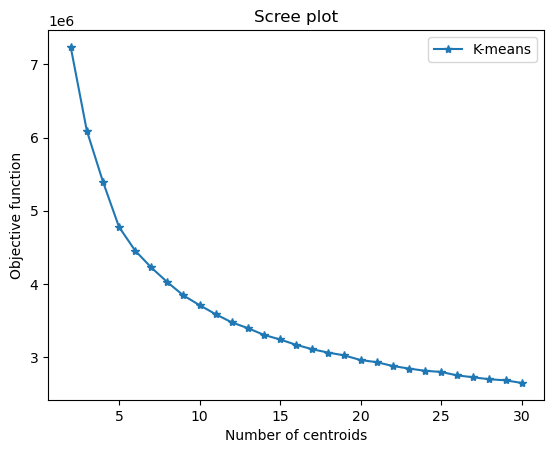

In [8]:
N_simulations = 10

res_k = list()

for n_c in range(2, 31):
    tmp_km = kmeans(n_c)
    min_loss = sys.maxsize
    losses = np.empty(N_simulations)
    i_tmp = 0
    iterations = np.empty(N_simulations)
    for i in range(N_simulations):
        loss, iteration, _ = tmp_km.fit(data=data_pts)
        if loss < min_loss:
            min_loss = loss
            i_min = i
            min_km = tmp_km
        losses[i] = loss
        iterations[i] = iteration
    print(n_c, losses[i_min])
    res_k.append([n_c, losses[i_min]])

res_k = np.array(res_k)
plt.plot(res_k[:, 0], res_k[:, 1], "*-", label="K-means")
plt.title("Scree plot")
plt.ylabel("Objective function")
plt.xlabel("Number of centroids")
plt.legend()


In [9]:
def tm(data, labels, k, tau):
    pi = np.zeros((k, k))
    for i in range(data.shape[0] - tau):
        a = labels[i]
        b = labels[i + tau]
        pi[a, b] += 1

    # print(pi)
    # print(np.sum(pi,axis=1,keepdims=True))

    pi = pi / np.sum(pi, axis=1, keepdims=True)

    # Check properties of a stochastic matrix
    # 1. All elements are nonzero
    # 2. sum_(alpha) Pi(alpha,beta) = 1 (for all beta)
    # assert (np.size(np.where(pi == 0)[0]) == 0)
    assert np.allclose(np.sum(pi, axis=1), 1.0, atol=1.0e-08)
    # print(pi)

    eigvals, eigvecs = np.linalg.eig(pi.T)

    sorted_index = np.argsort(eigvals)[::-1]
    sorted_eigvals = eigvals[sorted_index]
    sorted_eigvecs = eigvecs[:, sorted_index]

    # Make a plot for eigenvalues
    plt.plot(sorted_eigvals, "b.")
    plt.title("Sorted Eigenvalues")
    plt.xlabel(r"l")
    plt.ylabel(r"$\tau$ number")

    statdist = eigvecs[:, np.isclose(eigvals, 1)].ravel()
    statdist /= np.sum(statdist)
    # relaxation_timescales = -tau / np.log(np.abs(eigvals[np.isclose(eigvals, 1)==False]))

    return sorted_eigvals, sorted_eigvecs, statdist


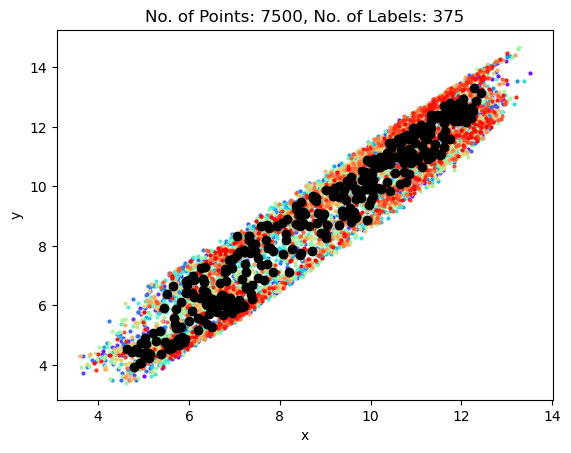

1338868.094326496 22


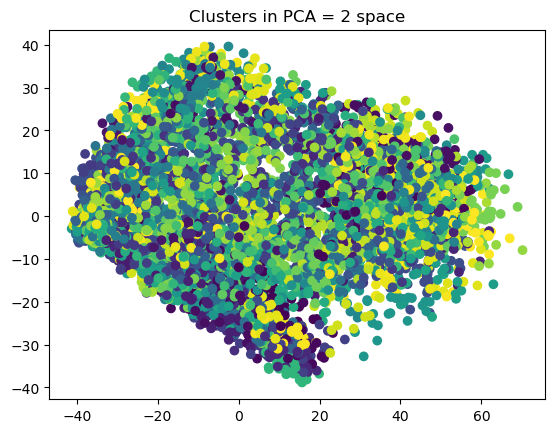

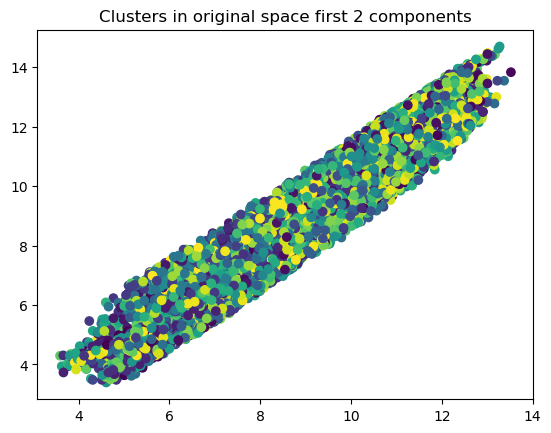

(375, 177)


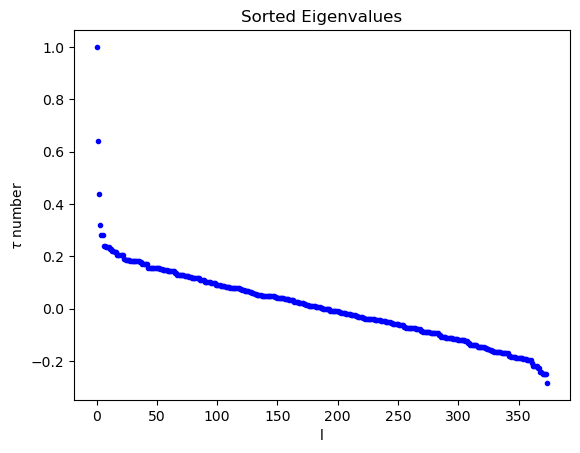

In [28]:
test_k = 375
test_km = kmeans(test_k)
loss, iteration, test_centroid_positions = test_km.fit(data)
test_km.plot()
print(loss, iteration)

test_labels = test_km.get_assignation()

plt.title(f"Clusters in PCA = {nc_pca} space")
plt.scatter(new_x[:, 0], new_x[:, 1], c=test_labels[:, 2])
plt.show()

plt.title("Clusters in original space first 2 components")
plt.scatter(test_labels[:, 0], test_labels[:, 1], c=test_labels[:, 2])
plt.show()

test_tau = 100
eval, evec, sd = tm(data_pts, test_labels[:, 2].astype(np.int64), test_k, test_tau)

# test_centroid_positions = test_km.get_centroid_positions()
print(test_centroid_positions.shape)


In [37]:
# Choose the number of Markov states based on the spectral gap
spectral_gap = eval[0] - eval[1]
num_states = np.sum(eval > spectral_gap)

print(spectral_gap)
print(num_states)


(0.3588146556182865+0j)
3


In [119]:
# Inspect the sign of the leading eigenvectors to identify the Markov states
n_ms = 1
markov_states = np.zeros(test_k)
for i in range(test_k):
    if evec[i, 1] > 0: 
        # evec[:,1] corresponds to the first eigenvector with a non=1 eigenvalue
        # since log of the eigval is taken, so that eigenvector (evec[:,0], eigval=1) is ignored
        markov_states[i] = -1
    else:
        markov_states[i] = +1

#print(markov_states)
# print(evec)

# right eigenvectors of Pi sum to 0 except the one corresponding to eigval=1
#print(evec.sum(axis=0))
#np.isclose(evec.sum(axis=0), 0.0, atol=1.0e-08)

if n_ms == 2:
    for i in range(test_k):
        if evec[i,1] > 0 and evec[i,2] > 0:
            markov_states[i] = -2
        elif evec[i,1] > 0 and evec[i,2] < 0:
            markov_states[i] = -1
        elif evec[i,1] < 0 and evec[i,2] > 0:
            markov_states[i] = +1
        elif evec[i,1] < 0 and evec[i,2] < 0:
            markov_states[i] = +2

ms = markov_states.copy()

In [120]:
n_ms = 1
markov_states = np.zeros(test_k)

pos_mask = np.all(evec[:,1:n_ms] > 0, axis=1)
neg_mask = np.all(evec[:,1:n_ms] <= 0, axis=1)
markov_states[pos_mask] = -n_ms
markov_states[neg_mask] = n_ms
for i in range(1, n_ms+1):
    pos_mask_i = pos_mask & np.all(evec[:,1:i+1] > 0, axis=1) & np.all(evec[:,i+1:n_ms] > 0, axis=1)
    neg_mask_i = neg_mask & np.all(evec[:,1:i+1] <= 0, axis=1) & np.all(evec[:,i+1:n_ms] <= 0, axis=1)
    markov_states[pos_mask_i] = -i
    markov_states[neg_mask_i] = i
    
#print(markov_states)
print(ms-markov_states)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [112]:
tmp = test_labels[:,2]
tmp2=np.zeros_like(tmp)
for i in range(len(tmp)):
    for j in range (len(markov_states)):
        if tmp[i] == j:
            tmp2[i] = markov_states[j]
            
print(np.min(tmp2), np.max(tmp2))

-1.0 1.0


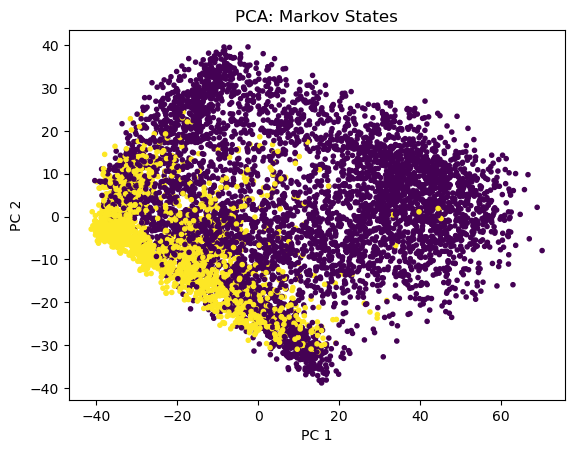

In [113]:
# 4: Dimensionality reduction and visualization
# Perform PCA on the microstates to obtain a 2D embedding

pca_vis = PCA(n_components=2)
new_centroid_positions = pca_vis.fit_transform(data)

plt.scatter(new_centroid_positions[:, 0], new_centroid_positions[:, 1], marker='.', c=tmp2)
plt.title("PCA: Markov States")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()


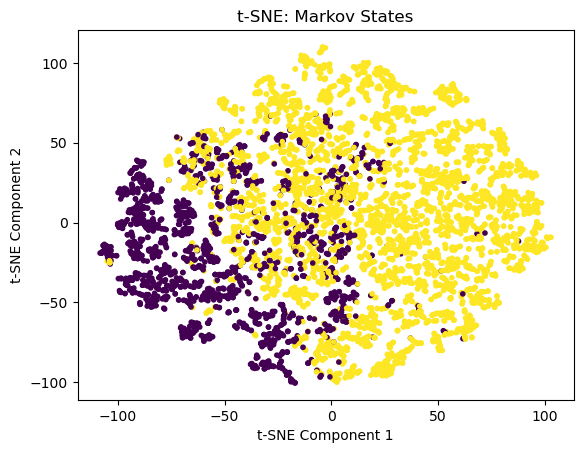

In [45]:
# 4: Dimensionality reduction and visualization
# Perform t-SNE on the microstates to obtain a 2D embedding
# perplexity refers to number of nearest neighbours chosen
embedding = TSNE(n_components=2, perplexity=7, random_state=1729).fit_transform(data)

# Plot the Markov states in the embedding
plt.scatter(embedding[:, 0], embedding[:, 1], marker='.', c=tmp2)
plt.title("t-SNE: Markov States")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()
